In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  tqdm import  tqdm
import warnings
warnings.filterwarnings("ignore")

In [429]:
petrol = pd.read_csv('petrol.csv')
diesel = pd.read_csv('diesel.csv')

In [430]:
print(petrol.shape,diesel.shape)

(5048, 4) (17235, 4)


In [431]:
diesel.head()

,city,date,rate,state
0,Agartala,2012-10-27,46.93,Tripura
1,Agartala,2013-01-18,47.45,Tripura
2,Agartala,2013-02-16,47.96,Tripura
3,Agartala,2013-03-23,47.46,Tripura
4,Agartala,2013-04-01,48.47,Tripura


In [432]:
diesel.city.value_counts()

Mumbai         1189
Delhi          1189
Chennai        1189
Kolkata        1177
Hyderabad      1133
Bengaluru      1129
Coimbatore      981
Pondicherry     948
Shillong        946
Aizwal          943
Agartala        816
Madurai         804
Meerut          804
Nizamabad       804
Varanasi        804
Dimapur         803
Allahabad       800
Karaikal        388
Haridwar        388
Name: city, dtype: int64

In [433]:
diesel_delhi = diesel[diesel.city=="Delhi"]
diesel_delhi.head()

,city,date,rate,state
5858,Delhi,2002-06-16,18.23,Delhi
5859,Delhi,2002-07-01,18.23,Delhi
5860,Delhi,2002-08-01,18.23,Delhi
5861,Delhi,2002-08-16,18.05,Delhi
5862,Delhi,2002-09-01,18.34,Delhi


In [434]:
diesel_delhi.reset_index(inplace=True)

In [435]:
diesel_delhi.head()

,index,city,date,rate,state
0,5858,Delhi,2002-06-16,18.23,Delhi
1,5859,Delhi,2002-07-01,18.23,Delhi
2,5860,Delhi,2002-08-01,18.23,Delhi
3,5861,Delhi,2002-08-16,18.05,Delhi
4,5862,Delhi,2002-09-01,18.34,Delhi


In [436]:
diesel_delhi.drop('index',axis=1,inplace=True)

In [437]:
diesel_delhi.head()

,city,date,rate,state
0,Delhi,2002-06-16,18.23,Delhi
1,Delhi,2002-07-01,18.23,Delhi
2,Delhi,2002-08-01,18.23,Delhi
3,Delhi,2002-08-16,18.05,Delhi
4,Delhi,2002-09-01,18.34,Delhi


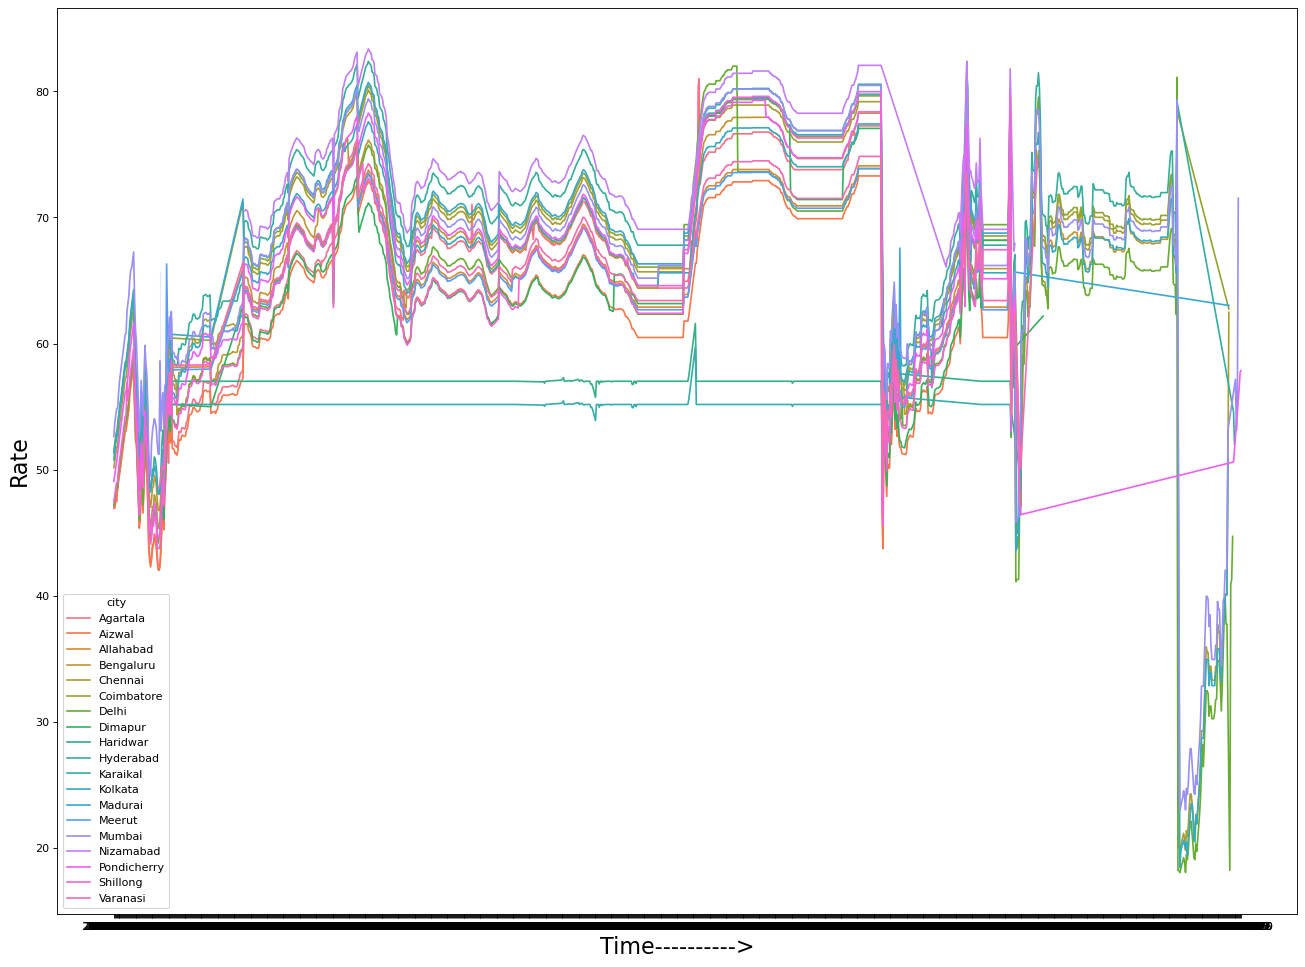

In [438]:
from matplotlib.pyplot import figure
figure(figsize=(20, 15), dpi=80)
sns.lineplot(x="date",y="rate",data=diesel,hue="city")
plt.ylabel('Rate',fontsize=20)
plt.xlabel('Time---------->',fontsize=20)
plt.show()

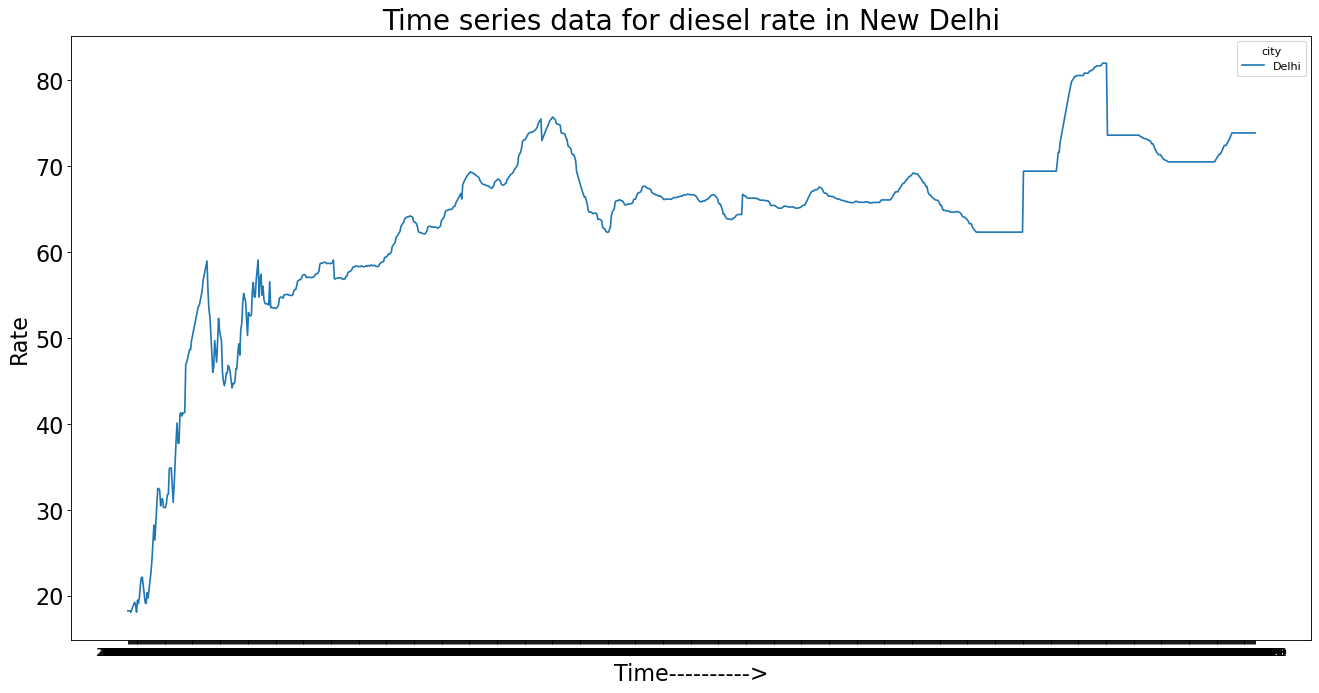

In [439]:
figure(figsize=(20, 10), dpi=80)
sns.lineplot(x="date",y="rate",data=diesel_delhi,hue="city")
plt.ylabel('Rate',fontsize=20)
plt.xlabel('Time---------->',fontsize=20)
plt.title('Time series data for diesel rate in New Delhi',fontsize=25)
plt.yticks(size=20)
plt.show()

In [440]:
diesel_delhi["year"] = diesel_delhi.date.map(lambda x:x.split('-')[0])
diesel_delhi["month"] = diesel_delhi.date.map(lambda x:x.split('-')[1])
diesel_delhi["day"] = diesel_delhi.date.map(lambda x:x.split('-')[2])
diesel_delhi.head()

,city,date,rate,state,year,month,day
0,Delhi,2002-06-16,18.23,Delhi,2002,06,16
1,Delhi,2002-07-01,18.23,Delhi,2002,07,01
2,Delhi,2002-08-01,18.23,Delhi,2002,08,01
3,Delhi,2002-08-16,18.05,Delhi,2002,08,16
4,Delhi,2002-09-01,18.34,Delhi,2002,09,01


In [441]:
diesel_delhi.tail()

,city,date,rate,state,year,month,day
1184,Delhi,2020-12-27,73.88,Delhi,2020,12,27
1185,Delhi,2020-12-28,73.88,Delhi,2020,12,28
1186,Delhi,2020-12-29,73.88,Delhi,2020,12,29
1187,Delhi,2020-12-30,73.88,Delhi,2020,12,30
1188,Delhi,2020-12-31,73.88,Delhi,2020,12,31


In [442]:
yearly_mean_rate = diesel_delhi.groupby('year')['rate'].mean()

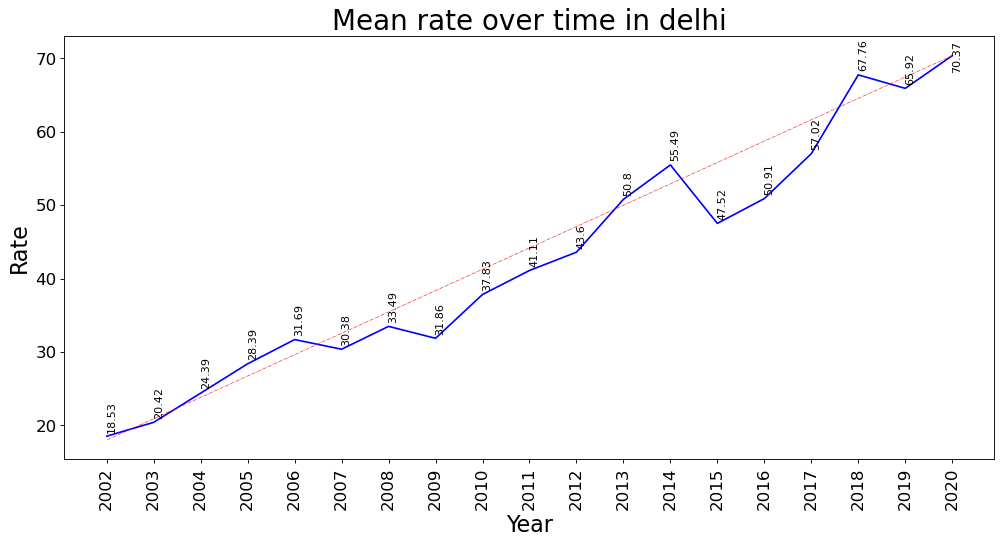

In [443]:
figure(figsize=(15, 7), dpi=80)
plt.plot(yearly_mean_rate,c='b')
plt.plot((18,0),(70.37,18),c='r',linestyle='-.',linewidth=0.5)
plt.title('Mean rate over time in delhi',fontsize=25)
for i,j in zip(yearly_mean_rate.index,yearly_mean_rate.values):
    if i == '2020':
        plt.text(i,j-2,round(j,2),rotation=90)
    else:
        plt.text(i,j+0.8,round(j,2),rotation=90)
plt.ylabel('Rate',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(rotation=90,size=15)
plt.yticks(rotation=0,size=15)
plt.show()

### So, to prove we don't have a stationary wave we plotted the mean price of Diesel for every consecutive year and it shows that - Mean is not constant over time from 2002 to 2020 which in turn proves that the data is not stationary.

Text(0, 0.5, 'Density')

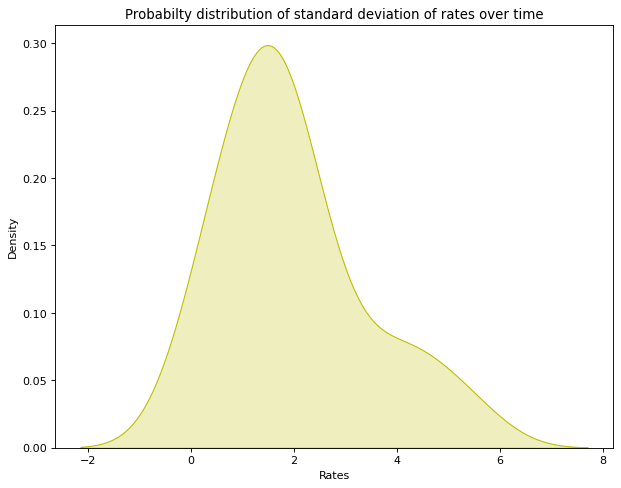

In [444]:
figure(figsize=(9, 7), dpi=80)
sns.kdeplot(diesel_delhi.groupby('year')['rate'].std(),shade=True,color='y')
plt.title('Probabilty distribution of standard deviation of rates over time')
plt.xlabel('Rates')
plt.ylabel('Density')

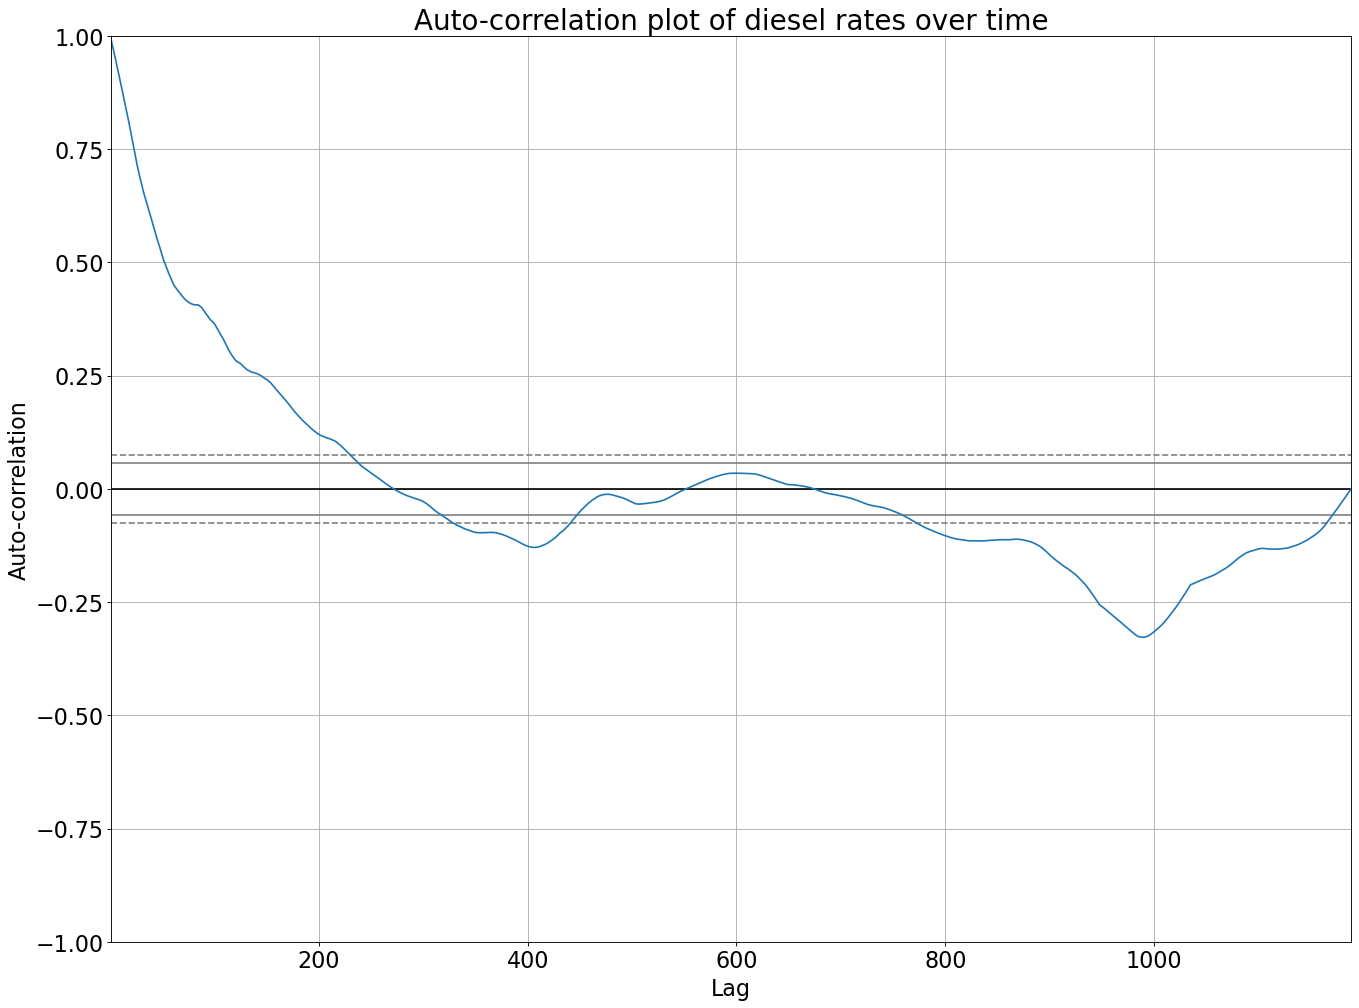

In [445]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
figure(figsize=(20, 15), dpi=80)
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(diesel_delhi["rate"])
plt.xlabel('Lag',fontsize=20)
plt.ylabel('Auto-correlation',fontsize=20)
plt.title('Auto-correlation plot of diesel rates over time',fontsize=25)
plt.xticks(size=20)
plt.yticks(size=20)
pyplot.show()

#The trend also suggests a decent increase in fuel price over the year. 
#Similarly, variance is not constant as well typically over time

<Figure size 2000x1600 with 0 Axes>

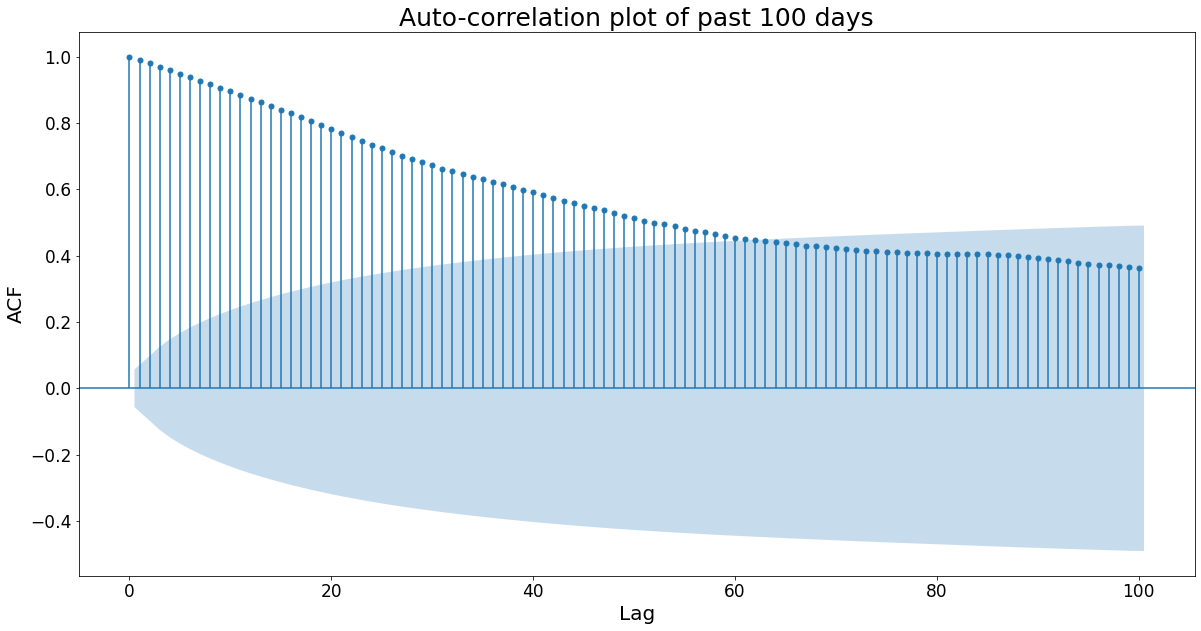

In [446]:
import statsmodels.api as sm
figure(figsize=(25, 20), dpi=80)

with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    sm.graphics.tsa.plot_acf(diesel_delhi.rate.squeeze(), lags=100)
plt.title('Auto-correlation plot of past 100 days',fontsize=25)
plt.xlabel('Lag',fontsize=20)
plt.ylabel('ACF',fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

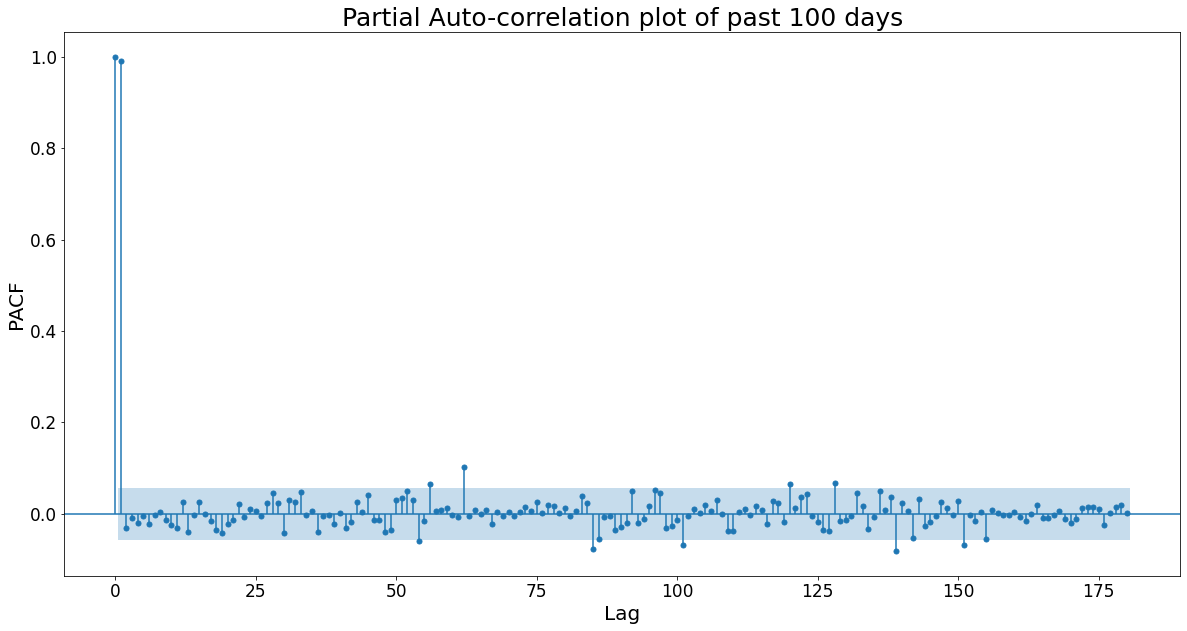

In [447]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    sm.graphics.tsa.plot_pacf(diesel_delhi.rate.squeeze(), lags=180)
plt.title('Partial Auto-correlation plot of past 100 days',fontsize=25)
plt.xlabel('Lag',fontsize=20)
plt.ylabel('PACF',fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

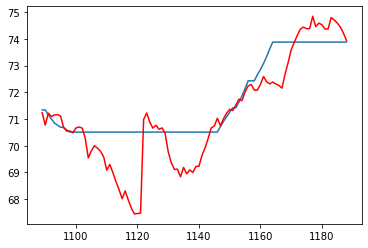

In [448]:
# create and evaluate a static autoregressive mo
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split dataset
X = diesel_delhi.rate
train, test = X[0:len(X)-100], X[len(X)-100:]
# train autoregression
model = AutoReg(train, lags=184,trend='t')
model_fit = model.fit()
#print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<AxesSubplot:ylabel='Density'>

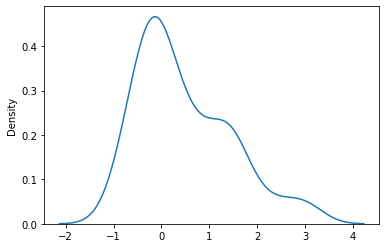

In [451]:
sns.kdeplot(test-predictions)

In [452]:
from sklearn.model_selection import GridSearchCV
parameters = {"lags":np.arange(0,200)}
clf = GridSearchCV(model, parameters)

In [453]:
lag = np.arange(1,200)
rmse = []
for i in lag:
    model = AutoReg(train, lags=i,trend='t')
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    rmse.append(sqrt(mean_squared_error(test, predictions)))
    
    

In [454]:
np.argmin(np.array(rmse))

184

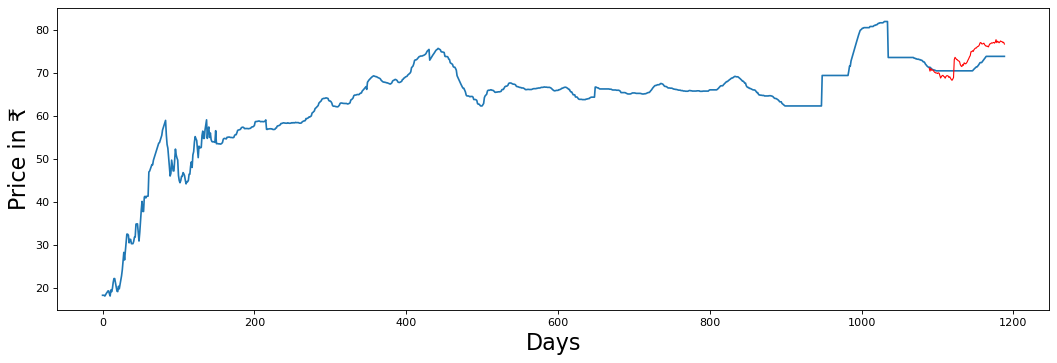

In [455]:
import statsmodels.api as sm
figure(figsize=(16, 5), dpi=80)
pyplot.plot(diesel_delhi.rate)
pyplot.plot(predictions, color='red',linewidth=1)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Price in ₹',fontsize=20)
plt.show()

### Adding new Test Data for next month and forecasting on the same

In [456]:
rates_jan_2021 = [73.88,
 73.88,
 73.88,
 73.88,
 73.88,
 73.88,
 74.14,
 74.42,
 74.42,
 74.42,
 74.42,
 74.42,
 74.42,
 74.67,
 74.92,
 74.92,
 74.92,
 74.92,
 75.17,
 75.42,
 75.42,
 75.42,
 75.67,
 75.92,
 75.92,
 75.92,
 76.27,
 76.52,
 76.52,
 76.52,
 76.52,
 76.52]

In [457]:
test_df = pd.DataFrame(data = {'Rate':rates_jan_2021[:30]},index=list(range(1188,1188+30)))
test_df.head()

,Rate
1188,73.88
1189,73.88
1190,73.88
1191,73.88
1192,73.88


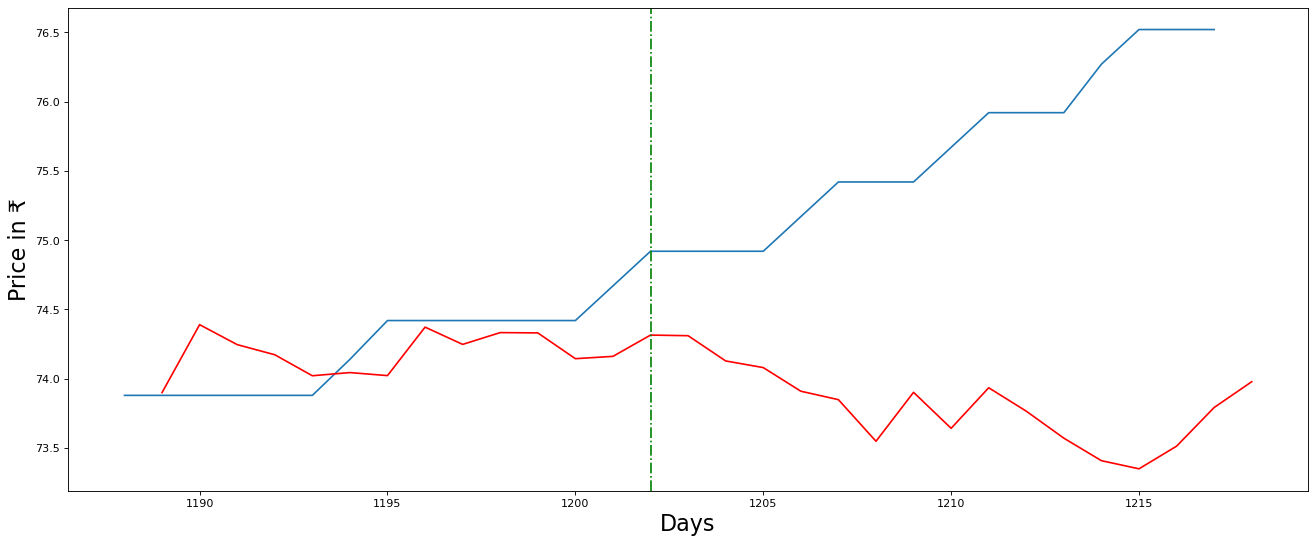

In [458]:
# create and evaluate a static autoregressive mo
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
figure(figsize=(20, 8), dpi=80)
# load dataset
# split dataset
X = diesel_delhi.rate
train,test = X[0:len(X)], test_df.Rate
# train autoregression
model = AutoReg(train, lags=184,trend='t')
model_fit = model.fit()
#print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Price in ₹',fontsize=20)
plt.axvline(x=1202,c='g',linestyle='-.')
pyplot.show()


#This is an application of Auto Regressive model and its forecast.
#Now, we have next 30 days Validation Data completely taken for month January. 


In [459]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split into train and test sets
X = diesel_delhi.rate
train, test = X[0:len(X)-30], X[len(X)-30:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in test:
    model = ARIMA(history, order=(0,0,25))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output
    predictions.append(yhat)
    obs = t
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes


Test RMSE: 0.242


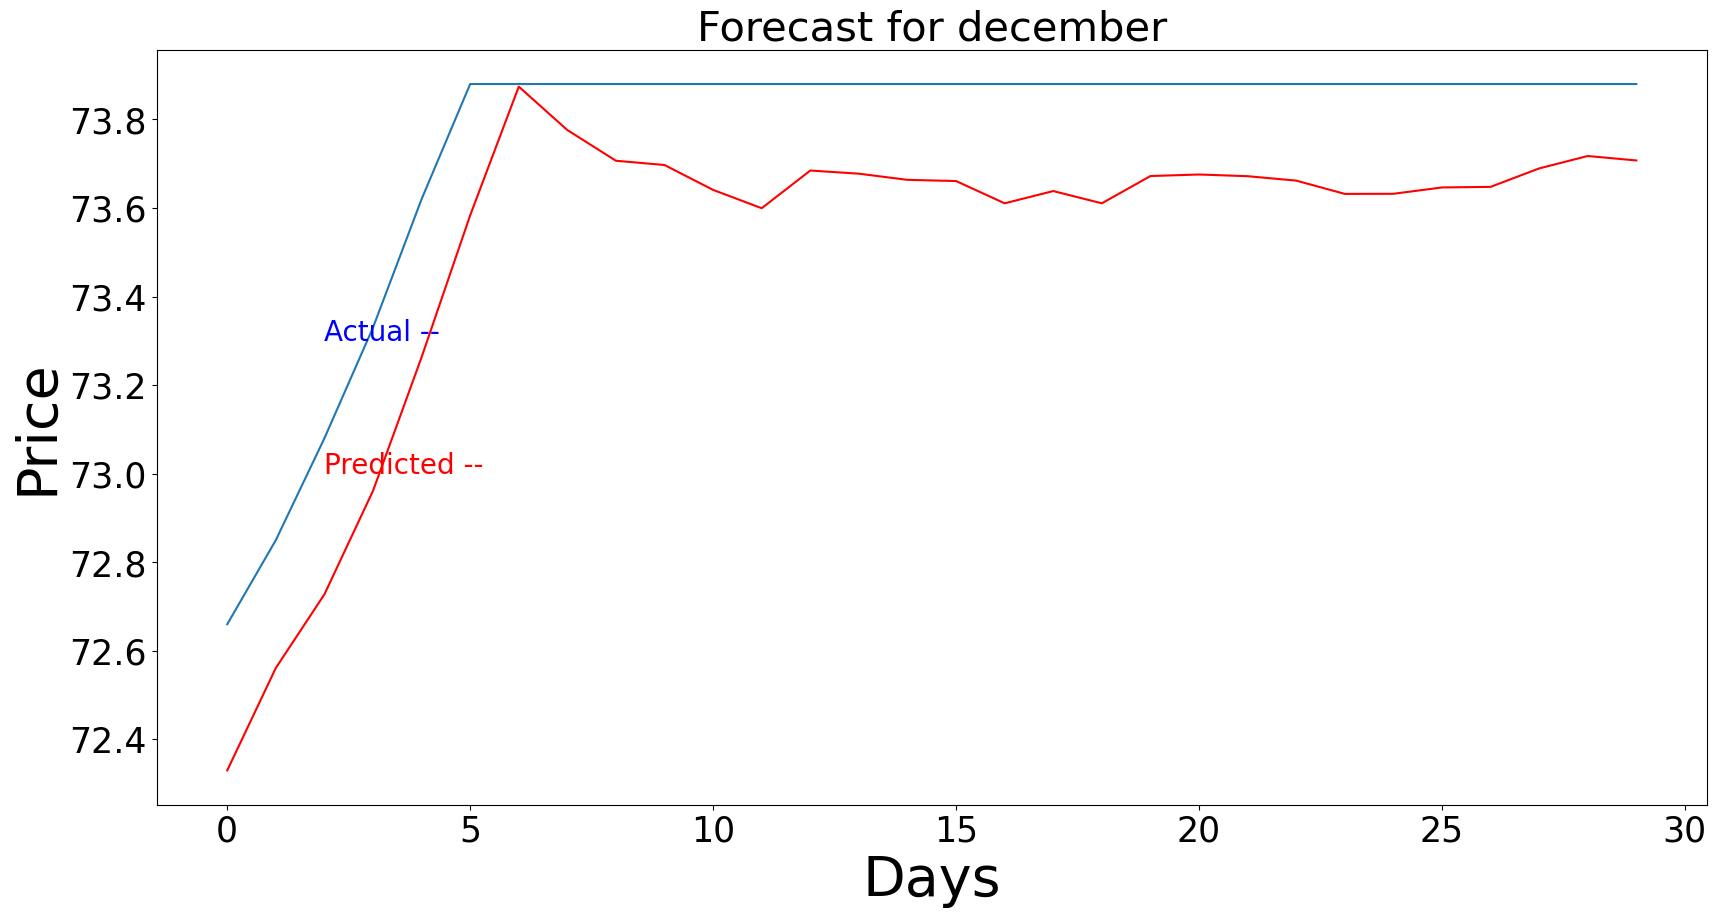

In [460]:
figure(figsize=(20, 10), dpi=100)
plt.plot(np.array(predictions),c='red')
plt.plot(np.array(test))
plt.title('Forecast for december',fontsize=30)
plt.xlabel('Days',fontsize=40)
plt.ylabel('Price',fontsize=40)
plt.xticks(size=25)
plt.yticks(size=25)
plt.text(2,73,"Predicted --",color="red",fontsize=20)
plt.text(2,73.3,"Actual --",color="blue",fontsize=20)
plt.show()

In [461]:
train, test = X[0:len(X)-30], X[len(X)-30:]
hist = [x for x in train]
rmse= []
preds= []
for i in test:
    model = ARIMA(hist, order=(0,0,25))
    model_fit = model.fit()
    yhat = model_fit.forecast()
    preds.append(yhat)
    hist.append(i)
    rmse.append(sqrt(mean_squared_error([i], yhat)))


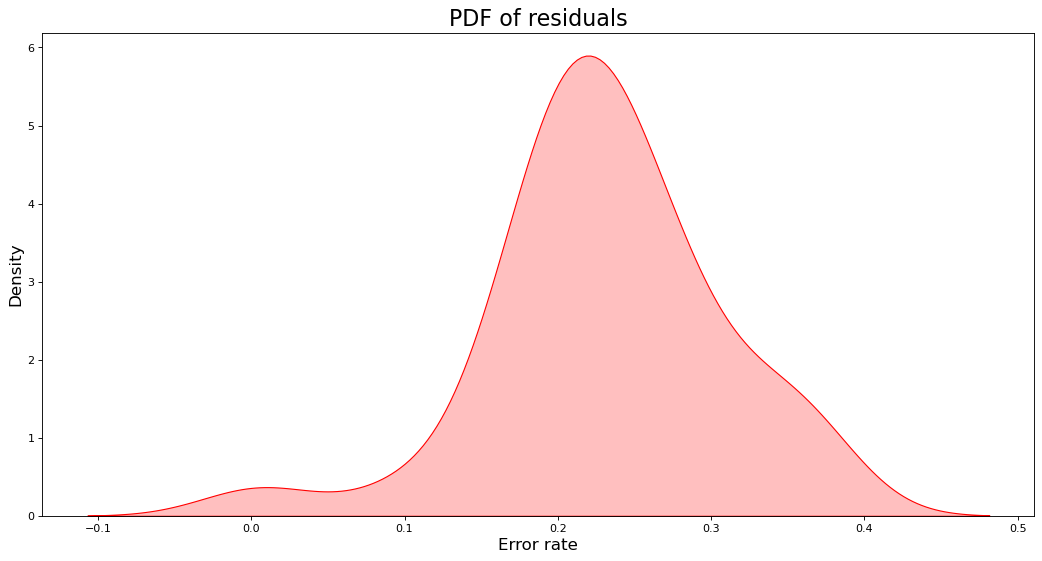

In [462]:
figure(figsize=(16, 8), dpi=80)
sns.kdeplot(np.abs(np.array(preds).reshape(1,-1)[0] - test),shade=True,color='r')
plt.title('PDF of residuals',fontsize=20)
plt.xlabel('Error rate',size=15)
plt.ylabel('Density',size=15)

plt.show()

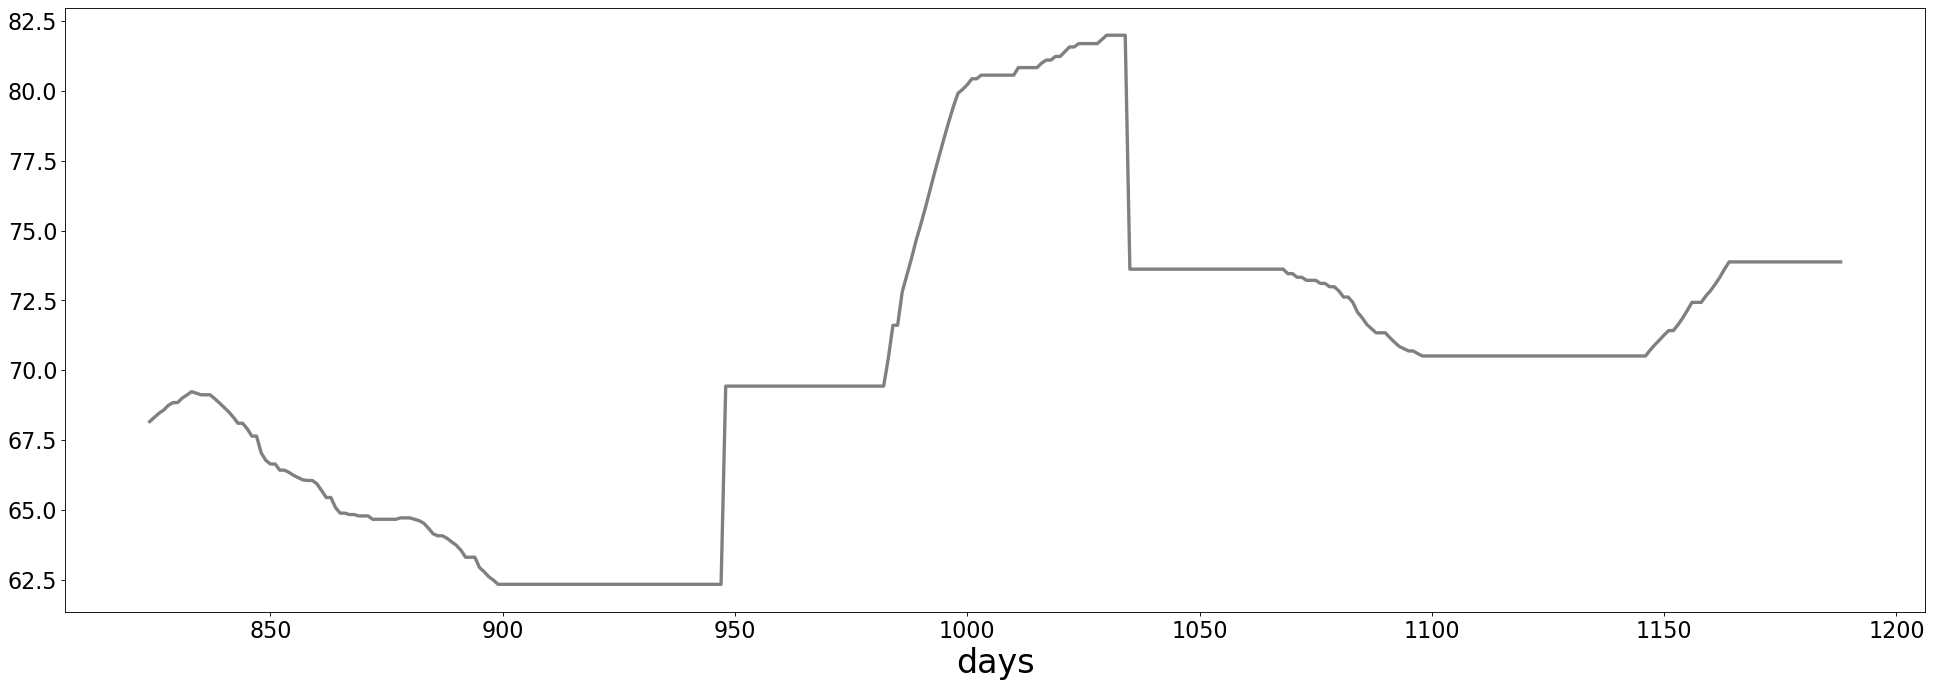

In [463]:
figure(figsize=(30, 10), dpi=80)
plt.plot(diesel_delhi.rate[len(diesel_delhi.rate)-365:],linewidth=3,c='gray')
plt.xlabel('days',size=30)  
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

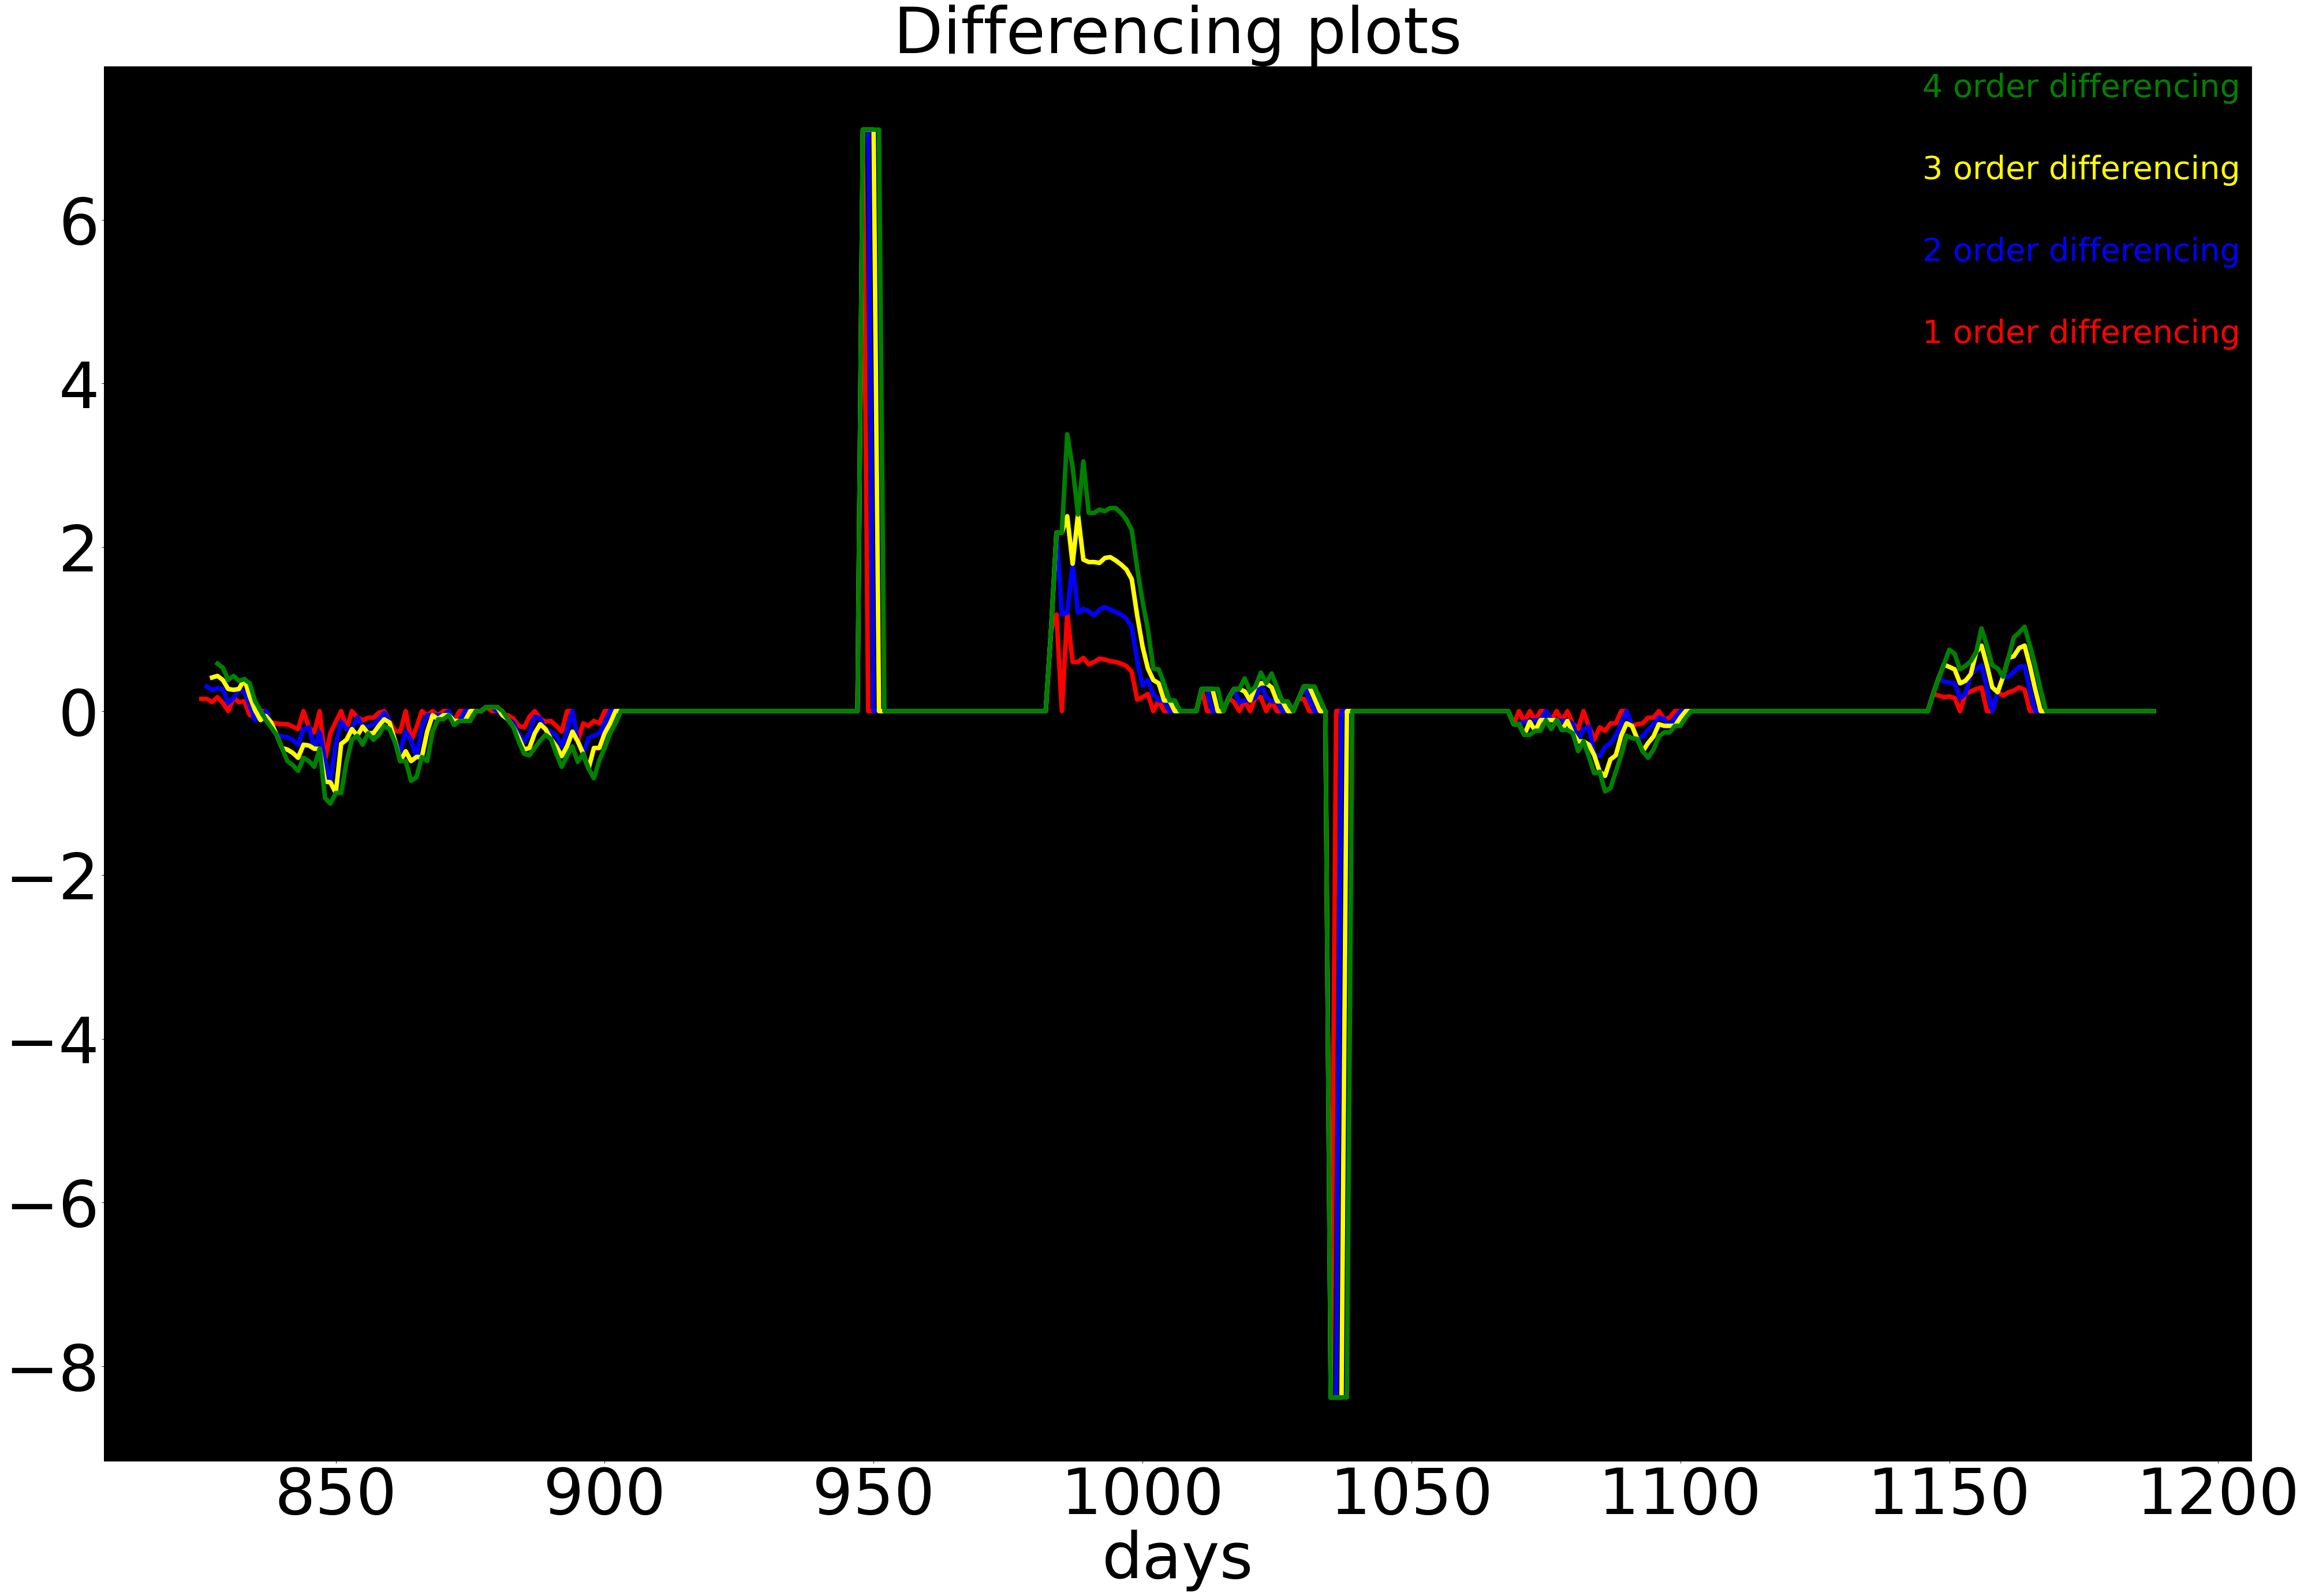

In [464]:
order = [1,2,3,4]
figure(figsize=(60, 40), dpi=80)
mycol = ['red','blue','yellow','green']
ax = plt.axes()
ax.set_facecolor("black")
for i,j in enumerate(order):
    #plt.subplot(4,1,(i+1))
    plt.plot(diesel_delhi.rate[len(diesel_delhi.rate)-365:].diff(j),c=mycol[i],linewidth=7)
    
    plt.text(1145,i+4.5,'{} order differencing'.format(i+1),fontsize=50,color=mycol[i])
plt.title('Differencing plots',fontsize=100)
plt.xlabel('days',size=100)  
plt.xticks(size=100)
plt.yticks(size=100)
plt.show()

### Hyper-parameter tuning 

In [465]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split into train and test sets
X = diesel_delhi.rate
train, test = X[0:len(X)-30], X[len(X)-30:]
rmse = []
avg = []
indices = []
# walk-forward validation
for j in tqdm([1,2,3,4,5]):
    for i in [1,2,3,4,5]:
        predictions = list()
        history = [x for x in train]
        for t in test:
            model = ARIMA(history, order=(i,1,j))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output
            predictions.append(yhat)
            obs = t
            history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
        # evaluate forecasts
        rmse.append(sqrt(mean_squared_error(test, predictions)))
        indices.append((i,j))
        
        
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [10:36<00:00, 127.38s/it]


In [466]:
indices[np.argmin(rmse)]

(5, 4)

In [467]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split into train and test sets
X = diesel_delhi.rate
train, test = X[0:len(X)-90], X[len(X)-90:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in tqdm(test):
    model = ARIMA(history, order=(5,2,4))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output
    predictions.append(yhat)
    obs = t
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [03:20<00:00,  2.23s/it]

Test RMSE: 0.088


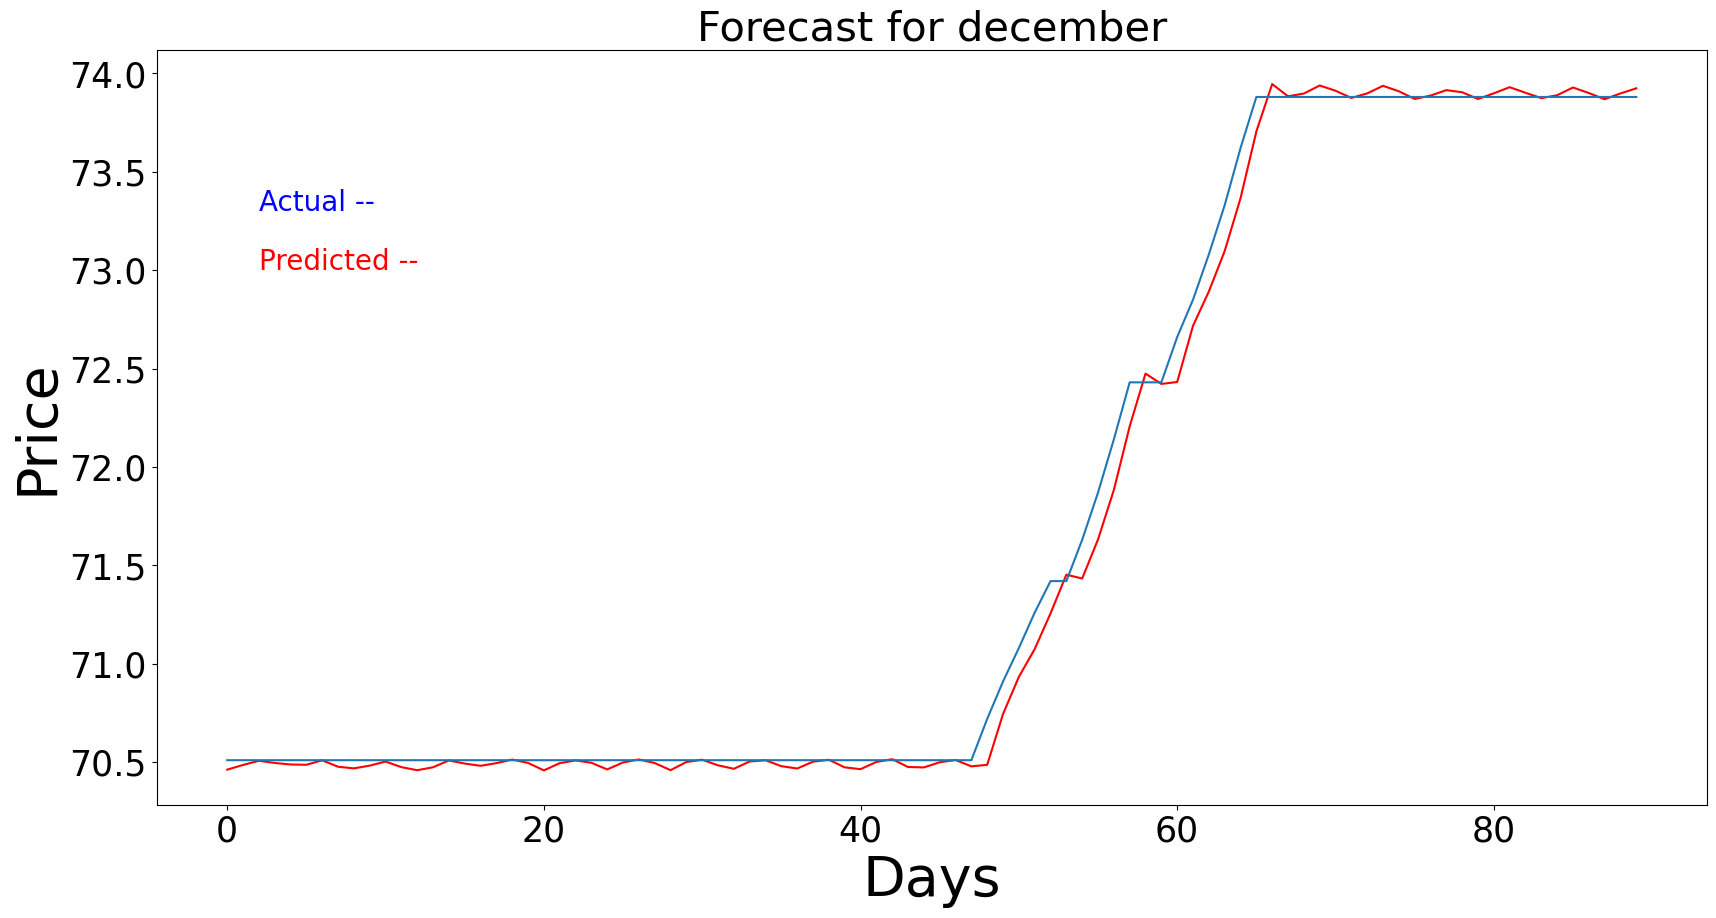

In [468]:
figure(figsize=(20, 10), dpi=100)
plt.plot(np.array(predictions),c='red')
plt.plot(np.array(test))
plt.title('Forecast for december',fontsize=30)
plt.xlabel('Days',fontsize=40)
plt.ylabel('Price',fontsize=40)
plt.xticks(size=25)
plt.yticks(size=25)
plt.text(2,73,"Predicted --",color="red",fontsize=20)
plt.text(2,73.3,"Actual --",color="blue",fontsize=20)
plt.show()

### Firstly, we analysed the dataset, and reinforced the fact that the data is not stationary using all the properties. When done we applied both the models –Auto Regressive Model (AR) Moving Averages Model - and forecasted the data for the completely unknown datapoints for next one month. We in the same applied hyperparameter tuning for forecasting. After that we applied differencing, used auto corelation and partial autocorrelation and finally applied ARIMA, performed hyperparameter tuning and at last forecasted the price for the next 90 days for Delhi City.